# Homework 2

This homework focuses on **resampling** and **noise**.

This homework will explore linear regression and resampling techniques by analysing data from a database of glaciers. The database is *Glatilda* for [*Glacier Ice Thickness Database*](https://www.gtn-g.ch/data_catalogue_glathida/).

1. Data Statistics
2. Data prep (5 points)
2. Mapping (10 points)
3. Correlations between parameters (5 points)
4. Linear regression and resampling techniques (10 points)

## 1. Data Prep (5 points total)

### a) Download data (1 point) 
The database is saved on a GitLab repository that you may clone: https://gitlab.com/wgms/glathida.git



In [7]:
import os

In [2]:
# answer
# os.system('git clone git@gitlab.com:wgms/glathida.git')
# os.system('git clone https://gitlab.com/wgms/glathida.git')

### b) Import Python modules (1 point) 
Import pandas, geopandas, plotting, raster files,  numpy, netcdf

In [1]:
# solution
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as cn

### c) Read data (2 points)
Read the glacier data from the file ``glathida/data/glacier.csv`` into a pandas data frame, and decribe briefly the dataframe content and its first few lines.

The data consists of various locations of glaciers described by latitude and longitudes. Each location has measurements of the glacier such as its area, thickness, and slope.

In [2]:
# solution
t_path = "data/glacier.csv"
df = pd.read_csv(t_path)
df.head()

,id,survey_id,name,external_db,external_id,latitude,longitude,date,max_date,area,...,mean_thickness,mean_thickness_uncertainty,max_thickness,max_thickness_uncertainty,number_points,number_profiles,length_profiles,interpolation_method,flag,remarks
0,1,1,Isfallsglaciären,WGI,SE4B000E0006,67.91500,18.56800,1979-03-01,1979-03-31,1.3,...,72.0,NaN,220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,Rabots glaciär,WGI,SE4B000E1016,67.91000,18.49600,1979-03-01,1979-03-31,4.1,...,84.0,NaN,175.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN
2,3,1,Storglaciären,WGI,SE4B000E0005,67.90000,18.57000,1979-03-01,1979-03-31,3.1,...,99.0,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2,South Cascade Glacier,WGI,US2M00264006,48.35698,-121.05735,1975-01-01,1975-12-31,2.0,...,99.0,NaN,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3,Athabasca Glacier,FOG,7,52.17540,-117.28400,NaN,NaN,3.8,...,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Source: Glacier Thickness Database (GlaThiDa)    
Repository URL: https://gitlab.com/wgms/glathida    
Accessed on: October 30, 2023

**Explore the data with visualization**
Before making any inference of models with the data, we will start by exploring basic correlations among parameters by plotting. In particular, we will focus on ``mean_thickness``, ``area``, ``mean_slope`` parameters.

### d) Remove bad data (1 point)

The database may contain Nans and other "bad" values (welcome to the data world!). First we will clean the data by removing nans. We are mostly interested in the thickness, area, and slope



In [3]:
#answer below 
df = df[['name', 'latitude', 'longitude', 'area', 'mean_thickness', 'mean_slope']]
df = df.dropna()
df.head()

,name,latitude,longitude,area,mean_thickness,mean_slope
32,Easton Glacier,48.75000,-121.83000,2.90,58.0,0.0
33,Lemon Creek Glacier,58.38000,-134.36000,11.70,66.0,0.0
34,Praviy Aktru,50.06134,87.69741,5.15,56.0,0.0
35,Maliy Aktru,50.04967,87.74552,2.84,86.0,0.0
36,Leviy Aktru,50.08008,87.69025,5.95,90.0,0.0


## 2. Mapping glaciers (10 points)

Make a global map of the glaciers. Use either of the tools we learned in class:
* Geopandas, DEMs from NetCDFfiles (see chapter 2.4)
* Pandas and Plotly (see chapter 2.2). You may need to transform some of the series into log-spaced values for better visualization.

### Option 1: Tif and matplotlib

You can use the ``elevation`` data from the DEM seen in class. Download the DEM file (https://www.dropbox.com/s/j5lxhd8uxrtsxko/HYP_50M_SR.tif?dl=1)

In [8]:
# solution
os.system('pip install wget')
import wget
import rasterio

  Using cached wget-3.2-py3-none-any.whl


In [9]:
wget.download("https://www.dropbox.com/s/j5lxhd8uxrtsxko/HYP_50M_SR.tif?dl=1")
fname = 'HYP_50M_SR.tif'
os.replace(fname, './data/'+fname)

In [10]:
elevation = rasterio.open('data/HYP_50M_SR.tif')


___Tips___: when plotting a image in ``matplotlib`` you need to add information about the physical dimensions of the image. You can calculate the ``bounds``.

In [11]:
bounds = (elevation.bounds.left, elevation.bounds.right, \
          elevation.bounds.bottom, elevation.bounds.top)

We will use ``matplotlib.pyplot`` to show the raster image in the background (tips: use ``imshow()``. The raster image in matplotlib can only import one frame and not three (R, G, B) frames. We will first stack the three images together. 

In [12]:
red = elevation.read(1)
green = elevation.read(2)
blue = elevation.read(3)
pix = np.dstack((red, green, blue))

In [13]:
df

,name,latitude,longitude,area,mean_thickness,mean_slope
32,Easton Glacier,48.750000,-121.830000,2.900,58.0,0.0
33,Lemon Creek Glacier,58.380000,-134.360000,11.700,66.0,0.0
34,Praviy Aktru,50.061340,87.697410,5.150,56.0,0.0
35,Maliy Aktru,50.049670,87.745520,2.840,86.0,0.0
36,Leviy Aktru,50.080080,87.690250,5.950,90.0,0.0
...,...,...,...,...,...,...
618,Blekumbreen,78.245480,16.064380,2.100,32.0,13.0
626,Tuyuksu (central),43.043653,77.080587,2.610,47.0,20.0
630,Aldegondabreen,77.971400,14.069100,6.737,65.0,6.0
744,Ariebreen,77.027200,15.485400,0.370,27.0,19.0


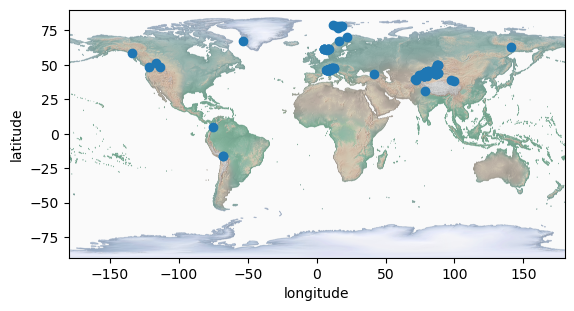

In [14]:
# solution
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.scatter('longitude', 'latitude', data=df)
plt.imshow(pix, extent=bounds)

## Option 2: Plotly

You may use plotly. For improved visibility, transform some of the data into log-spaced. You may add these transformed Series into the Pandas, and use them as input to plotly.

In [15]:

import plotly.express as px
import plotly.io as pio
# import imageio
pio.renderers.default = 'vscode' # writes as standalone html, 
# pio.renderers.default = 'iframe' # writes files as standalone html, 
# pio.renderers.default = 'png' # writes files as standalone html, 
# try notebook, jupyterlab, png, vscode, iframe


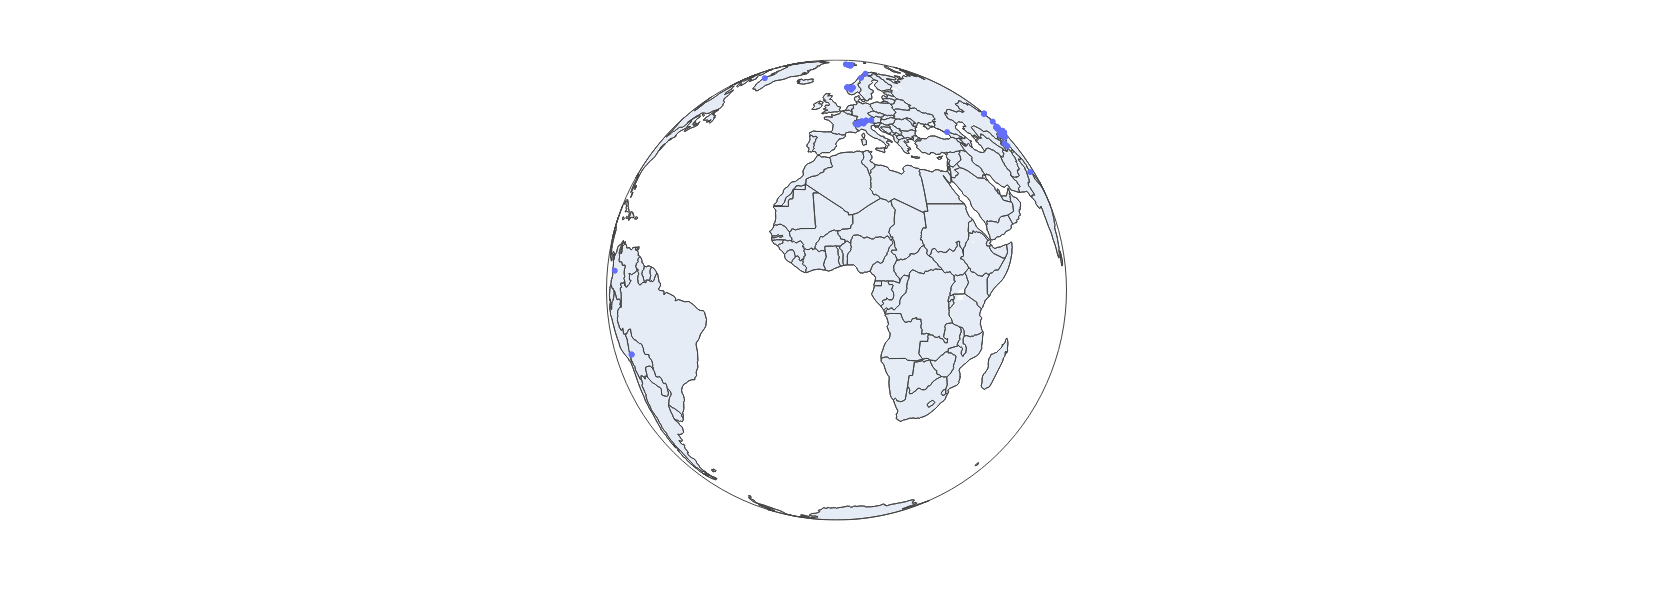

In [16]:
# solution
fig = px.scatter_geo(df,
                     lat='latitude',lon='longitude', 
                     range_color=(6,9),
                     height=600, width=600,
                     # size='mean_thickness', color='magnitude',
                     hover_name="name",
                     hover_data=['area','mean_thickness','mean_slope']);
fig.update_geos(resolution=110, showcountries=True)
fig.update_geos(resolution=110, showcountries=True,projection_type="orthographic")
fig

In [17]:
df2=df.sort_values(by='mean_thickness')

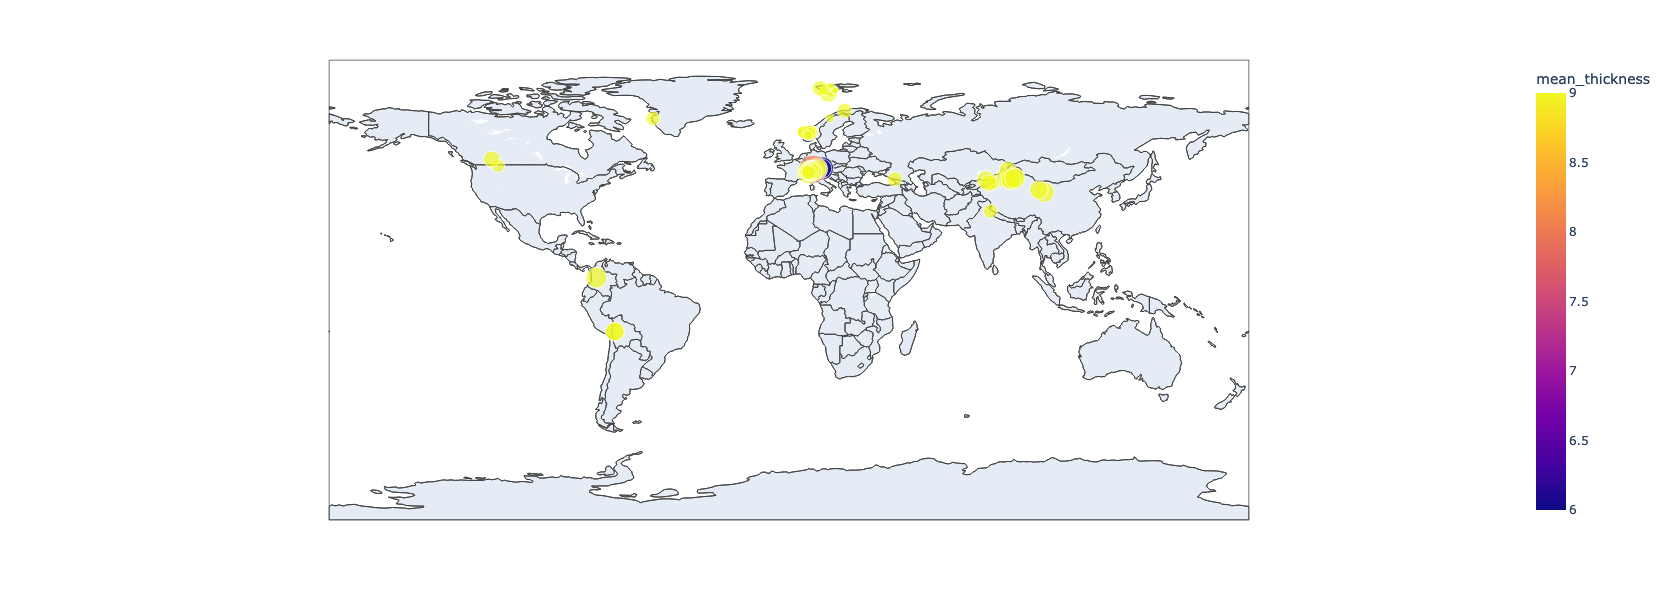

In [18]:
fig = px.scatter_geo(df2,
                     lat='latitude',lon='longitude', 
                     range_color=(6,9),
                     height=600, width=1000,
                     size='mean_slope', color='mean_thickness',
                     hover_name="name",
                     hover_data=['area','mean_thickness','mean_slope']);
fig.update_geos(resolution=110, showcountries=True)

df['log_area'] = np.log(df['area'])
df['log_slope'] = np.log(df['mean_slope'])
df['log_thickness'] = np.log(df['mean_thickness'])## 3. Correlations between data parameters ( 5 points total)

Make plots to vizualise the correlation, or lack of, between all three data. Make at least three plots.

### a) Basic correlations using Matplotlib (2 points)

Make 3 plots using matplotlib to visualize slope, mean_thickness, and area. Use logscale to see the correlatons.

__Tips__: 
* Use the function ``scatter`` to plot the values of mean thickness, mean slope, area, and latitude. 
* use one of the dataframe columns as a color using the argument ``c``. You can also vary the ``colormap`` using the argument ``cmap``. Help on colormaps can be found here: https://matplotlib.org/stable/tutorials/colors/colormaps.html. Be mindful of Color-Vision Deficient readers and read *Crameri, F., Shephard, G.E. and Heron, P.J., 2020. The misuse of colour in science communication. Nature communications, 11(1), pp.1-10. https://doi.org/10.1038/s41467-020-19160-7* (find it on the class Gdrive). You can add a third "data" by choosing a marker color that scales with an other parameter. For instance, try coloring your marker with the ``LAT`` parameter to look at systematic latitudinal trends from the equator to the poles.
* Do not forget to adjust fontsize, figure size (at least 10,8), grid, labels with  of the features (example: km). ou may also explore the *logarithmic* correlations by mapping the axis from linear to logarithmic scale ``plt.xscale('log')``.

In [19]:
df['log_area'] = np.log(df['area'])
df['log_slope'] = np.log(df['mean_slope'])
df['log_thickness'] = np.log(df['mean_thickness'])

/srv/conda/envs/notebook/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



[Text(0.5, 1.0, 'Log Data'), Text(0.5, 0, 'Slope'), Text(0, 0.5, 'Thickness')]

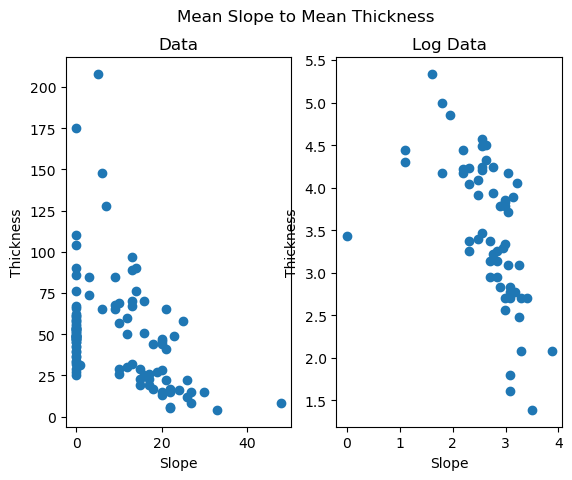

In [20]:
# Figure 1: Mean slope vs mean thickness
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Mean Slope to Mean Thickness')
ax1.scatter(df['mean_slope'], df['mean_thickness'])
ax1.set(title='Data', xlabel = 'Slope', ylabel = 'Thickness')
ax2.scatter(df['log_slope'], df['log_thickness'])
ax2.set(title = 'Log Data', xlabel = 'Slope', ylabel = 'Thickness')

[Text(0.5, 1.0, 'Log Data'), Text(0.5, 0, 'Thickness'), Text(0, 0.5, 'Area')]

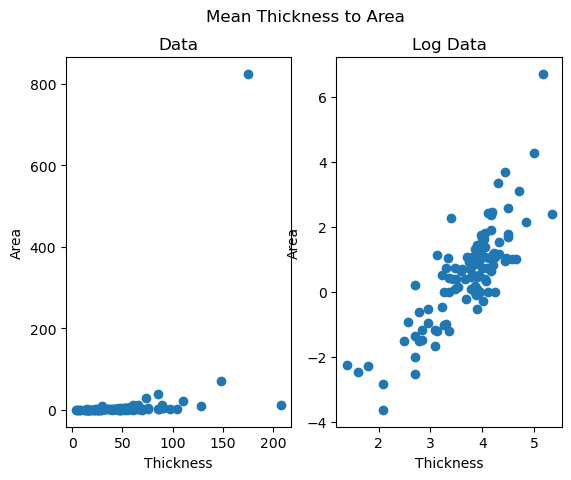

In [21]:
# Figure 2: area vs mean thickness
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Mean Thickness to Area')
ax1.scatter(df['mean_thickness'], df['area'])
ax1.set(title='Data', xlabel = 'Thickness', ylabel = 'Area')
ax2.scatter(df['log_thickness'], df['log_area'])
ax2.set(title = 'Log Data', xlabel = 'Thickness', ylabel = 'Area')

[Text(0.5, 1.0, 'Log Data'), Text(0.5, 0, 'Area'), Text(0, 0.5, 'Slope')]

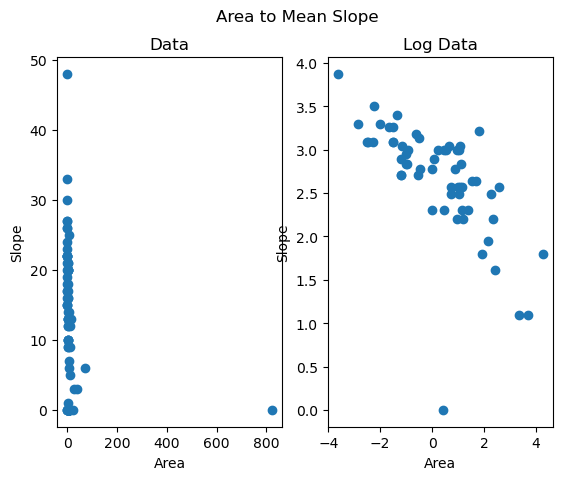

In [22]:
# Figure 2: area vs mean slope
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Area to Mean Slope')
ax1.scatter(df['area'], df['mean_slope'])
ax1.set(title='Data', xlabel = 'Area', ylabel = 'Slope')
ax2.scatter(df['log_area'], df['log_slope'])
ax2.set(title = 'Log Data', xlabel = 'Area', ylabel = 'Slope')

### b) 3D Scatter plot using Plotly (1 point)

Use the plotly ``scatter_3d`` plot. Make sure to change the pandas series for log scales.

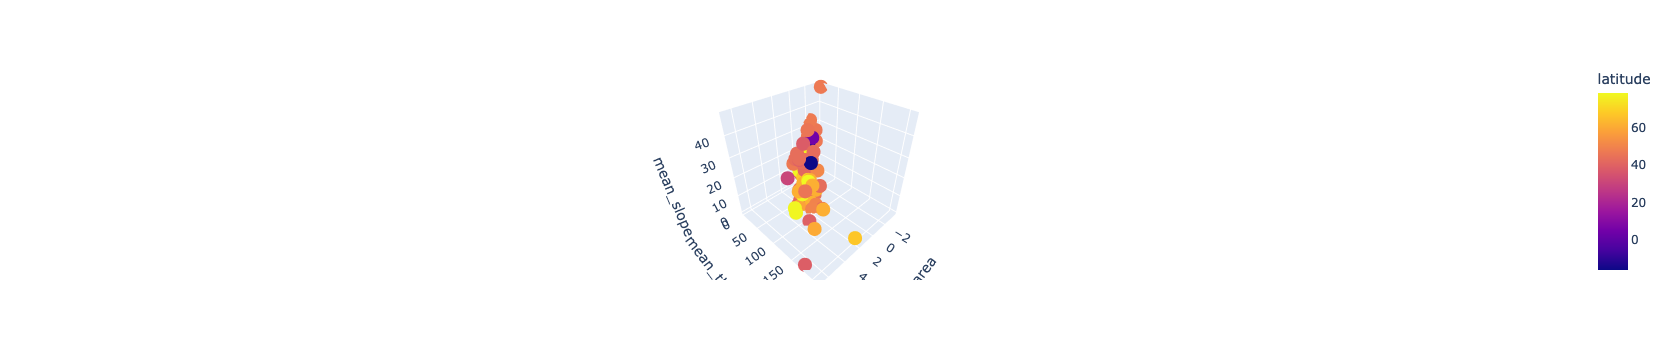

In [23]:
fig = px.scatter_3d(df, x='log_area', y='mean_thickness', z='mean_slope',
              color='latitude')
fig.show()

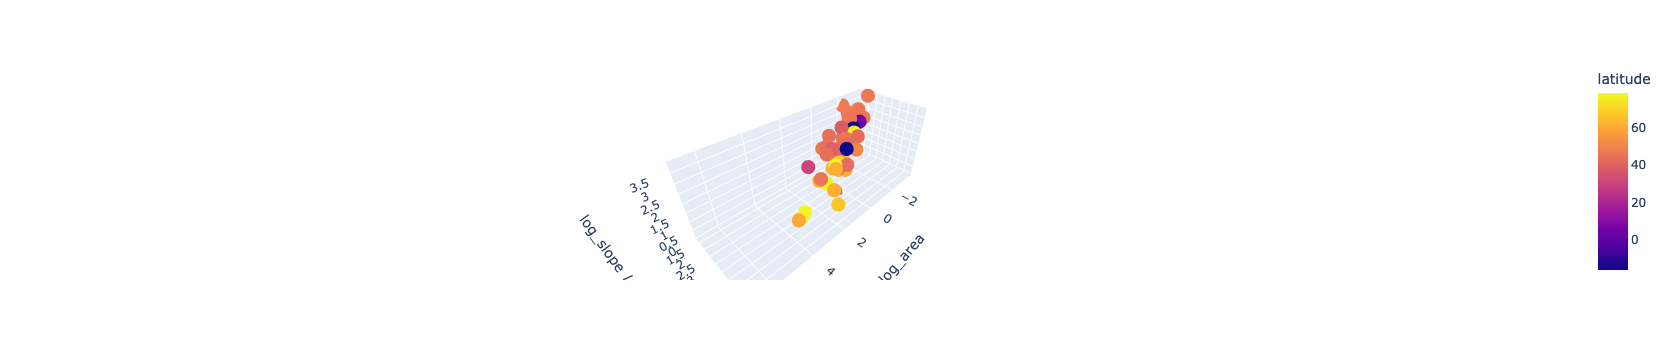

In [24]:
fig = px.scatter_3d(df, x='log_area', y='log_thickness', z='log_slope',
              color='latitude')
fig.show()

newDf = df[['log_area', 'log_slope', 'log_thickness']]
allCorr = newDf.corr(method='pearson')
print(allCorr)### c) Pandas Correlation function (1 point)

You may use Pandas functionalities to explore correlation between data. Use the function ``corr`` on the dataframe and the matplotlib function ``matshow`` to plot a heatmap of the correlations

In [25]:
#solution
newDf = df[['log_area', 'mean_slope', 'mean_thickness']]
df['mean_slope'] = df['mean_slope'] * -1
allCorr = newDf.corr(method='pearson')
print(allCorr)

                log_area  mean_slope  mean_thickness
log_area        1.000000   -0.571754        0.768393
mean_slope     -0.571754    1.000000       -0.411533
mean_thickness  0.768393   -0.411533        1.000000


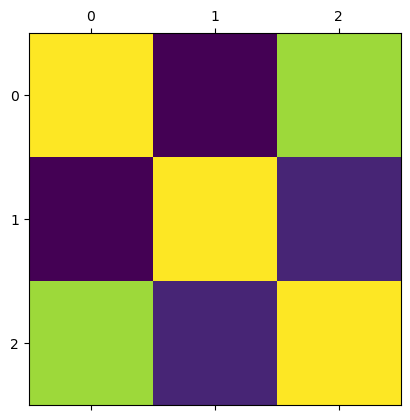

In [26]:
plt.matshow(allCorr)

### f) Seaborn Plotting (1 point)

Seaborn is a great python package for basic data anlytics. See documentation [here](!https://seaborn.pydata.org/). You can visualize the data by plotting data features against each other and explore visually data correlations.

In [27]:
#solution
import seaborn as sns

<AxesSubplot: >

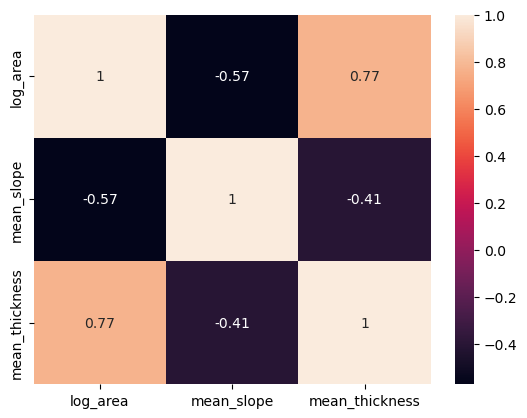

In [28]:
# solution
sns.heatmap(allCorr, xticklabels=True, yticklabels=True, annot=True)

Discuss the basic correlations among the data. Do these correction make sense when you think about the shapes of glaciers?

The area and the average thickness of the glaciers have a good correlation but the average slope has a small correlations with the other features.

## 4. Linear Regression (10 points total counted in the next section)
You found from basic data visualization that the three parameters ``mean_slope``, ``mean_thickness``, and ``area`` are correlated. It does make physical sense because a *steep* glaciers is likely to be in the high mountains regions, hanging on the mountain walls, and thus be constrained, and conversely, a flat glacier is either at its valley, ocean terminus or on ice sheets.

### a) Simple linear regression (2 points)
We will now perform a regression between the parameters (or their log!). Linear regressions are models that can be imported from scikit-learn. Log/exp functions in numpy as ``np.log()`` and ``np.exp()``.
Remember that a linear regression is finding $a$ and $b$ knowing both $x$ and the data $y$ in $y = Ax +b$. We want to predict ice thickness from a crude estimate of the glacier area.

__Tips__: 
a. make sure that the dimensions are correct and that there is no NaNs and zeros.
b. Make sure to inport the scikit learn linear regression function and the error metrics.

In [32]:
len(df['area'])
df['mean_slope'] = df['mean_slope'] * -1

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extracting 'area' and 'mean_slope' columns
X = df[['area']]
y = df['mean_slope']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 963.2110242641563
R-squared: -9.35158841246673


Make a plot of the data and the linear regression your performed

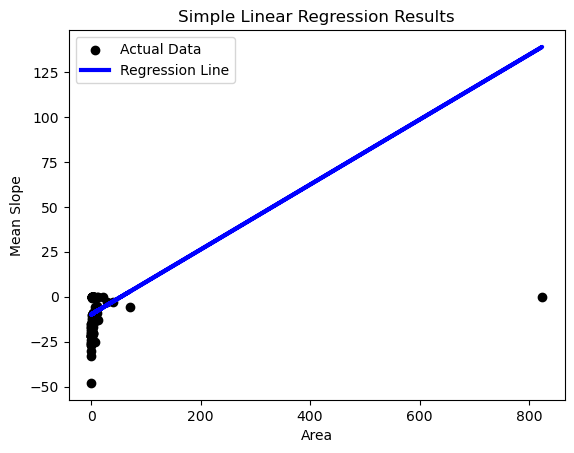

In [34]:
# solution
# Scatter plot of the actual data
plt.scatter(X, y, color='black', label='Actual Data')

# Regression line
plt.plot(X, model.predict(X), color='blue', linewidth=3, label='Regression Line')

plt.xlabel('Area')
plt.ylabel('Mean Slope')
plt.title('Simple Linear Regression Results')
plt.legend()
plt.show()

**Briefly comment on the quality of your fit and a linear regression (1 point)**

The fit is pretty bad. There is one outlier that is really skewing the regression line. (The far right one at 800 area and 200 thickness)

### b) Leave One Out Cross Validation linear regression (1 point)


Perform the LOCCV on the ``area`` and ``thickness`` values. Predict the ``thickness`` value knowing a ``area`` value. Use material seen in class. Make a plot of your fit.

In [68]:
from sklearn.model_selection import LeaveOneOut
# solution# Assuming you have a pandas DataFrame named 'df' with columns 'area' and 'mean_slope'
# Extracting features and target
X = df[['area']]
y = df['mean_slope']

# Initialize the model
model = LinearRegression()

# Initialize Leave-One-Out Cross-Validator
loo = LeaveOneOut()

# Regression line values
min_mse = float("inf")
intercept = 0
slope = 0
best_model = "test"

# Lists to store predicted values and actual values
y_pred = []
y_actual = []

# Perform Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)
    
    mse = mean_squared_error(X_train, y_train)
    if(mse < min_mse):
        min_mse = mse
        intercept = model.intercept_
        slope = model.coef_[0]
        best_model = model
        
print(f"slope={slope}    intercept={intercept}    mse={min_mse}")

slope=0.21017979182171148    intercept=-10.083785128022566    mse=321.1507234999816


In [87]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

# Assuming your data is in a pandas DataFrame named 'df' with columns 'area' and 'mean_slope'
X = df[['area']].values
y = df['mean_slope'].values

# Specify the number of splits (k) equal to the number of data points
k = len(X)

# Regression line values
min_mse = float("inf")
intercept = 0
slope = 0
best_model = "test"


kf = KFold(n_splits=k)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    mse = mean_squared_error(X_train, y_train)
    if(mse < min_mse):
        min_mse = mse
        intercept = model.intercept_
        slope = model.coef_[0]
        best_model = model

    print(f"Fold {i + 1}:")
    # print(f"  Train: indices={train_index}")
    # print(f"  Test:  indices={test_index}")
    print(f"  Regression Line: y = {model.coef_[0]} * x + {model.intercept_}")
    print()


Fold 1:
  Regression Line: y = 0.013681227305171385 * x + -9.405190331660068

Fold 2:
  Regression Line: y = 0.013559008068176654 * x + -9.402688800046315

Fold 3:
  Regression Line: y = 0.013649674343071612 * x + -9.404545367790059

Fold 4:
  Regression Line: y = 0.013682071600003976 * x + -9.405207581710378

Fold 5:
  Regression Line: y = 0.013638506094934798 * x + -9.404316942065368

Fold 6:
  Regression Line: y = 0.013711575083184914 * x + -9.405810121058426

Fold 7:
  Regression Line: y = 0.01370549004891541 * x + -9.405685888983886

Fold 8:
  Regression Line: y = 0.01367124787099426 * x + -9.404986407654697

Fold 9:
  Regression Line: y = 0.013641198013322586 * x + -9.404372006957182

Fold 10:
  Regression Line: y = 0.01356422019082378 * x + -9.402795663836104

Fold 11:
  Regression Line: y = 0.013663111220748567 * x + -9.40482009729531

Fold 12:
  Regression Line: y = 0.013683760640021884 * x + -9.405242089784227

Fold 13:
  Regression Line: y = 0.21017979182171148 * x + -10.083

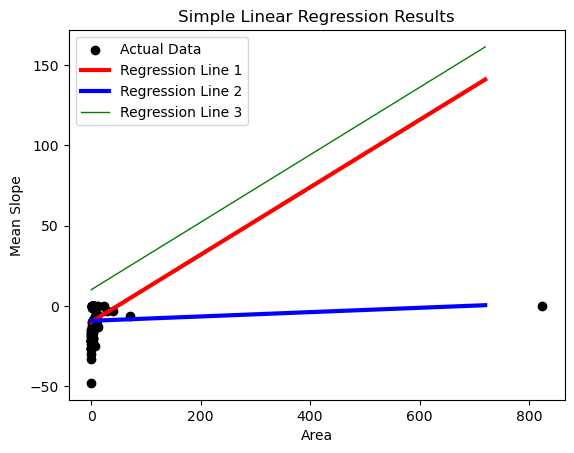

In [90]:
x = np.arange(0, 800, 80)

# solution
# Scatter plot of the actual data
plt.scatter(df['area'], df['mean_slope'] * 1, color='black', label='Actual Data')

# Regression line
plt.plot(x, x*0.21-10.08, color='red', linewidth=3, label='Regression Line 1')
plt.plot(x, x*0.0135-9.2746, color='blue', linewidth=3, label='Regression Line 2')
plt.plot(x, x*slope - intercept, color='green', linewidth=1, label='Regression Line 3')


plt.xlabel('Area')
plt.ylabel('Mean Slope')
plt.title('Simple Linear Regression Results')
plt.legend()
plt.show()

### c) Bootstrapping (1 point)

Perform the same analysis but using a bootstrapping technique. Output the mean and standard deviation of the slope. An illustration with a histogram  may help.

In [92]:
df[['area']].shape

(110, 1)

In [115]:
from sklearn.utils import resample
# solution

# Assuming you have a pandas DataFrame named 'df' with columns 'area' and 'mean_slope'
# Extracting features and target
X = df[['area']]
y = df['mean_thickness']

# Initialize the model
model = LinearRegression()

# Number of bootstrap samples
n_bootstrap = 1000  # You can adjust this based on your needs

# List of all means and intercepts
slopes = np.array([])
intercepts = np.array([])

# Lists to store predicted values and actual values
y_pred_bootstrap = []
y_actual_bootstrap = []

# Perform bootstrapping
for _ in range(n_bootstrap):
    # Create a bootstrap sample
    X_bootstrap, y_bootstrap = resample(X, y, random_state=np.random.randint(110))

    # Train the model on the bootstrap sample
    model.fit(X_bootstrap, y_bootstrap)

    # Make predictions on the original dataset
    y_pred_bootstrap.append(model.predict(X).flatten())
    y_actual_bootstrap.append(y.values)
    
    # Adding slopes and intercepts to array
    slopes = np.append(slopes, model.coef_[0])
    intercepts = np.append(intercepts, model.intercept_)

# Calculate mean squared error for each bootstrap sample
mse_bootstrap = [mean_squared_error(y_actual, y_pred) for y_actual, y_pred in zip(y_actual_bootstrap, y_pred_bootstrap)]

# Calculate the mean and standard deviation of mean squared errors
mean_mse_bootstrap = np.mean(mse_bootstrap)
std_mse_bootstrap = np.std(mse_bootstrap)

print(f'Mean Squared Error (Bootstrap): {mean_mse_bootstrap}')
print(f'Standard Deviation of MSE (Bootstrap): {std_mse_bootstrap}')

Mean Squared Error (Bootstrap): 10169.593237542565
Standard Deviation of MSE (Bootstrap): 20436.784309501065


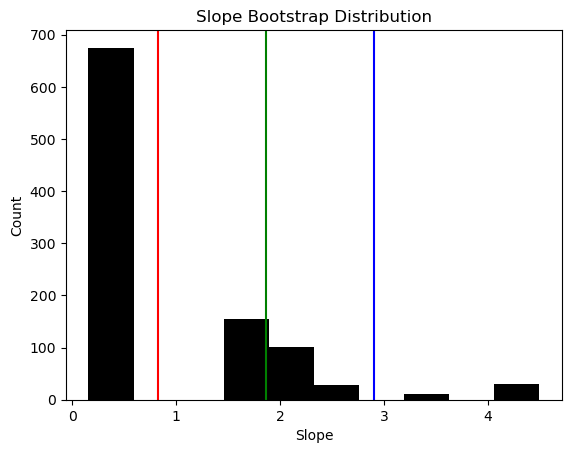

Average Slope: 0.8211331805207008
Standard Deviation: 1.0414530498425398


In [128]:
# Calculating mean and std of slopes numpy array
slope_array_mean = np.mean(slopes)
array_std = np.std(slopes)

# Plot up the corr_coef_collector values
plt.hist(slopes, color='black')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.title('Slope Bootstrap Distribution')
plt.axvline(x = slope_array_mean, color='r')
plt.axvline(x = slope_array_mean + array_std, color='g')
plt.axvline(x = slope_array_mean + 2 * array_std, color='b')

# # Show the true correlation coefficient
# plt.axvline(x=correlation_matrix[0,1], color='red')
# plt.axvline(x=np.median(corr_coef_collector), color='blue')
# plt.legend(['True correlation coefficient', 'Median correlation coefficient'])
plt.show()
print(f'Average Slope: {slope_array_mean}')
print(f'Standard Deviation: {array_std}')

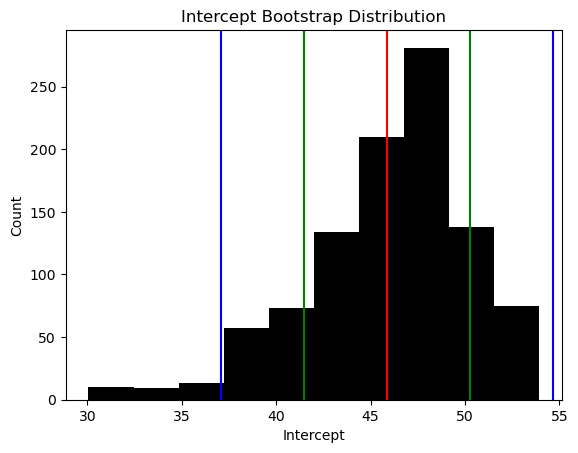

Average Intercept: 45.871398606428514
Standard Deviation: 4.3845527889680875


In [129]:
# Calculating mean and std of slopes numpy array
intercept_array_mean = np.mean(intercepts)
array_std = np.std(intercepts)

# Plot up the corr_coef_collector values
plt.hist(intercepts, color='black')
plt.xlabel('Intercept')
plt.ylabel('Count')
plt.title('Intercept Bootstrap Distribution')
plt.axvline(x = intercept_array_mean, color='r')
plt.axvline(x = intercept_array_mean + array_std, color='g')
plt.axvline(x = intercept_array_mean - array_std, color='g')
plt.axvline(x = intercept_array_mean + 2 * array_std, color='b')
plt.axvline(x = intercept_array_mean - 2 * array_std, color='b')

# # Show the true correlation coefficient
# plt.axvline(x=correlation_matrix[0,1], color='red')
# plt.axvline(x=np.median(corr_coef_collector), color='blue')
# plt.legend(['True correlation coefficient', 'Median correlation coefficient'])
plt.show()
print(f'Average Intercept: {intercept_array_mean}')
print(f'Standard Deviation: {array_std}')

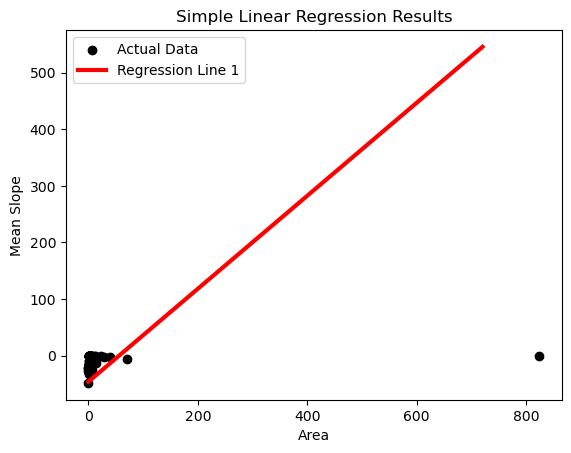

In [130]:
x = np.arange(0, 800, 80)

# solution
# Scatter plot of the actual data
plt.scatter(df['area'], df['mean_slope'] * 1, color='black', label='Actual Data')

# Regression line
plt.plot(x, x * slope_array_mean - intercept_array_mean, color='red', linewidth=3, label='Regression Line 1')


plt.xlabel('Area')
plt.ylabel('Mean Slope')
plt.title('Simple Linear Regression Results')
plt.legend()
plt.show()

### d) Predict the thickness of a glacier (2 points)

Let assume that you measure a glacier of area 10 km$^2$. Can you use your bootstrap regression framework to provide a distribution of possible values of the ice thickness ? Output the mean and standard deviation of the predicted ice thickness.

In [138]:
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings

# Suppress the specified warning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.base")

# Assuming you have a pandas DataFrame named 'df' with columns 'area' and 'mean_thickness'
# Extracting features and target
X = df[['area']]
y = df['mean_thickness']

# Initialize the model
model = LinearRegression()

# Number of bootstrap samples
n_bootstrap = 1000  # You can adjust this based on your needs

# Area of the glacier you measured
measured_area = 10  # in km²

# Lists to store predicted ice thickness values
ice_thickness_bootstrap = np.array([])

# Perform bootstrapping
for _ in range(n_bootstrap):
    # Create a bootstrap sample
    X_bootstrap, y_bootstrap = resample(X, y, random_state=np.random.randint(110))

    # Train the model on the bootstrap sample
    model.fit(X_bootstrap, y_bootstrap)

    # Predict ice thickness for the measured area
    predicted_thickness = model.predict([[measured_area]])
    
    # Append the predicted thickness to the list
    ice_thickness_bootstrap = np.append(ice_thickness_bootstrap, predicted_thickness)

# Calculate the mean and standard deviation of predicted ice thickness
mean_thickness_bootstrap = np.mean(ice_thickness_bootstrap)
std_thickness_bootstrap = np.std(ice_thickness_bootstrap)

print(f'Mean Predicted Ice Thickness: {mean_thickness_bootstrap} meters')
print(f'Standard Deviation of Predicted Ice Thickness: {std_thickness_bootstrap} meters')

warnings.resetwarnings()

Mean Predicted Ice Thickness: 54.30383964789071 meters
Standard Deviation of Predicted Ice Thickness: 7.648152770715441 meters


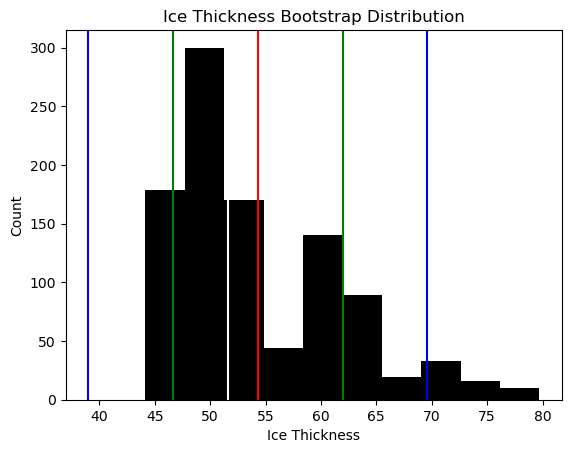

Average Intercept (Red): 54.30383964789071
Standard Deviation (Green Blue): 7.648152770715441
Median (White): 51.57413357173299


In [146]:
# Calculating mean and std of slopes numpy array
ice_thickness_array_mean = np.mean(ice_thickness_bootstrap)
ice_thickness_array_median = np.median(ice_thickness_bootstrap)
array_std = np.std(ice_thickness_bootstrap)

# Plot up the corr_coef_collector values
plt.hist(ice_thickness_bootstrap, color='black')
plt.xlabel('Ice Thickness')
plt.ylabel('Count')
plt.title('Ice Thickness Bootstrap Distribution')
plt.axvline(x = ice_thickness_array_mean, color='r')
plt.axvline(x = ice_thickness_array_mean + array_std, color='g')
plt.axvline(x = ice_thickness_array_mean - array_std, color='g')
plt.axvline(x = ice_thickness_array_mean + 2 * array_std, color='b')
plt.axvline(x = ice_thickness_array_mean - 2 * array_std, color='b')
plt.axvline(x = ice_thickness_array_median, color='white')

# # Show the true correlation coefficient
# plt.axvline(x=correlation_matrix[0,1], color='red')
# plt.axvline(x=np.median(corr_coef_collector), color='blue')
# plt.legend(['True correlation coefficient', 'Median correlation coefficient'])
plt.show()
print(f'Average Intercept (Red): {ice_thickness_array_mean}')
print(f'Standard Deviation (Green Blue): {array_std}')
print(f'Median (White): {ice_thickness_array_median}')